In [1]:
from tensorflow.keras.datasets.fashion_mnist import load_data

# Fashion-MNIST 데이터를 다운
(x_train, y_train), (x_test, y_test) = load_data()
print(x_train.shape, x_test.shape)

# import os
# import numpy as np
# from six.moves import urllib
# import tensorflow as tf

# import tensorflow_datasets.public_api as tfds


# (x_train, y_train), (x_test, y_test) = tfds.image_classification.FashionMNIST
# print(x_train.shape, x_test.shape)

# _FASHION_MNIST_CITATION = """\
# @article{DBLP:journals/corr/abs-1708-07747,
#   author    = {Han Xiao and
#                Kashif Rasul and
#                Roland Vollgraf},
#   title     = {Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning
#                Algorithms},
#   journal   = {CoRR},
#   volume    = {abs/1708.07747},
#   year      = {2017},
#   url       = {http://arxiv.org/abs/1708.07747},
#   archivePrefix = {arXiv},
#   eprint    = {1708.07747},
#   timestamp = {Mon, 13 Aug 2018 16:47:27 +0200},
#   biburl    = {https://dblp.org/rec/bib/journals/corr/abs-1708-07747},
#   bibsource = {dblp computer science bibliography, https://dblp.org}
# }
# """

# class FashionMNIST(MNIST):
#     URL = "http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/"

#     # TODO(afrozm): Try to inherit from MNIST's _info and mutate things as needed.
#     def _info(self):
#         return tfds.core.DatasetInfo(
#             builder=self,
#             description=("Fashion-MNIST is a dataset of Zalando's article images "
#                          "consisting of a training set of 60,000 examples and a "
#                          "test set of 10,000 examples. Each example is a 28x28 "
#                          "grayscale image, associated with a label from 10 "
#                          "classes."),
#             features=tfds.features.FeaturesDict({
#                 "image":
#                     tfds.features.Image(shape=MNIST_IMAGE_SHAPE),
#                 "label":
#                     tfds.features.ClassLabel(names=[
#                         "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
#                         "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
#                     ]),
#             }),
#             supervised_keys=("image", "label"),
#             homepage="https://github.com/zalandoresearch/fashion-mnist",
#             citation=_FASHION_MNIST_CITATION,
#         )


(60000, 28, 28) (10000, 28, 28)


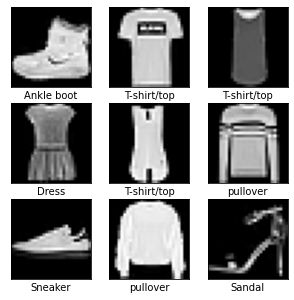

In [2]:
from numpy.random.mtrand import randint
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

class_names = ['T-shirt/top', 'trouser', 'pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
sample_size = 9
random_idx = np.random.randint(0, 60000, size = sample_size)

plt.figure(figsize = (5, 5))

for i, idx in enumerate(random_idx):
  plt.subplot(3, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap = 'gray')
  plt.xlabel(class_names[y_train[i]])

plt.show()


In [3]:
# 0~1범위로 만듦
x_train = x_train / 255
x_test = x_test / 255

from tensorflow.keras.utils import to_categorical
# 각 데이터의 레이블을 범주형 형태로 변경
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 검증 데이터 셋 만들기
from sklearn.model_selection import train_test_split

# 학습/테스트 데이터를 7:3 비율로 분리
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=777)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

first_model = Sequential()

# 입력 데이터의 형태를 명시
first_model.add(Flatten(input_shape = (28, 28)))    # (28, 28) -> ( 28 * 28)
first_model.add(Dense(64, activation = 'relu'))     # 64개의 출력을 가지는 Dense층
first_model.add(Dense(32, activation = 'relu'))     # 64개의 출력을 가지는 Dense층
first_model.add(Dense(10, activation = 'softmax'))  # 10개의 출력을 가지는 신경망


In [ ]:
first_model